# **1. Black Scholes Formula**



In [194]:
import numpy as np 
from math import sqrt, exp, log, pi
from scipy.stats import norm 

In [195]:
def BS_call_price(S_0, K, sigma, r, t, delta):
  d_1 = (log(S_0/K)+(r-delta+sigma**2/2)*t)/(sigma*sqrt(t))
  d_2 = d_1-sigma*sqrt(t) 
  return S_0*exp(-delta*t)*norm.cdf(d_1)-K*exp(-r*t)*norm.cdf(d_2)

def BS_put_price(S_0, K, sigma, r, t, delta):
  d_1 = (log(S_0/K)+(r-delta+sigma**2/2)*t)/(sigma*sqrt(t))
  d_2 = d_1-sigma*sqrt(t)
  return K*exp(-r*t)*norm.cdf(-d_2)-S_0*exp(-delta*t)*norm.cdf(-d_1)

In [196]:
S_0 = 100 
K = 120
r = 0.013            # 10 year treasury rate = 1.30% (Last Updated Aug 31 2021, 18:00 EDT)
t = 1         
delta = 0
sigma = 0.5


# Test our funcitons
print("The Black-Scholes European call option price is", BS_call_price(S_0, K, sigma, r, t, delta), 
      "\nThe Black-Scholes European put option price is", BS_put_price(S_0, K, sigma, r, t, delta))


C_0 = BS_call_price(S_0, K, sigma, r, t, delta)
P_0 = BS_put_price(S_0, K, sigma, r, t, delta)

if abs((C_0-P_0)-(S_0*exp(-delta*t)-K*exp(-r*t))) <= 0.001:
  print("\nPut-call parity is satisfied.")
else:
  print("\nPut-call parity is NOT satisfied.")

The Black-Scholes European call option price is 13.533186104198634 
The Black-Scholes European put option price is 31.983282306633136

Put-call parity is satisfied.


# **2. Newton-Raphson method**

In [197]:
def Newton_IV(option_price, S_0, K, r, t, delta, option_type="call"):
  tol = 1e-3                            # set tolerance to be 0.1%
  epsilon = 1                           # epsilon is the actual percentage change of implied volatility estimated from one iteration to the other 

  count = 0
  max_iter = 1000                       # stopping criteria

  iv = 0.5                             # initial guess of the implied volatility

  while epsilon > tol:
    count += 1
    if count >= max_iter:
      print("Break on count")
      break;
  
    orig_iv = iv                      # hold a copy of the initial guess

    d_1 = (log(S_0/K)+(r-delta+iv**2/2)*t)/(iv*sqrt(t))
    d_2 = d_1-iv*sqrt(t)

    if option_type == "call":
      diff = BS_call_price(S_0, K, iv, r, t, delta) - option_price
    
    elif option_type == "put":
      diff = BS_put_price(S_0, K, iv, r, t, delta) - option_price
    
    else:
      raise ValueError("Option_type must be 'put' or 'call'")

    vega = S_0*norm.pdf(d_1)*sqrt(t)    # derivative of the option price with respect to volatility 

    iv = -diff/vega + iv

    epsilon = abs((iv-orig_iv)/orig_iv)

    return iv

In [198]:
# Test call option

option_price = 13.5
print("The implied volatility for the call option is", Newton_IV(option_price, S_0, K, r, t, delta, "call"))

error = (abs(Newton_IV(option_price, S_0, K, r, t, delta, "call")-0.5)/0.5)*100
print("The error percentage is", error, "%")


# Test put option

option_price = 32
print("\n\nThe implied volatility for the put option is", Newton_IV(option_price, S_0, K, r, t, delta, "put"))

error = (abs(Newton_IV(option_price, S_0, K, r, t, delta, "put")-0.5)/0.5)*100
print("The error percentage is", error, "%")

The implied volatility for the call option is 0.4991648731186123
The error percentage is 0.16702537627754088 %


The implied volatility for the put option is 0.5004207000328179
The error percentage is 0.08414000656358223 %


In [199]:
# Another test with new parameters

t2 = 0.01

print("The Black-Scholes European call option price is", BS_call_price(S_0, K, sigma, r, t2, delta), 
      "\nThe Black-Scholes European put option price is", BS_put_price(S_0, K, sigma, r, t2, delta))


C_0 = BS_call_price(S_0, K, sigma, r, t2, delta)
P_0 = BS_put_price(S_0, K, sigma, r, t2, delta)

if abs((C_0-P_0)-(S_0*exp(-delta*t2)-K*exp(-r*t2))) <= 0.001:
  print("\nPut-call parity is satisfied.")
else:
  print("\nPut-call parity is NOT satisfied.")

The Black-Scholes European call option price is 0.00017901639433542428 
The Black-Scholes European put option price is 19.9845800303504

Put-call parity is satisfied.


In [200]:
# Test put option

option_price = 20
print("The implied volatility for the put option is", Newton_IV(option_price, S_0, K, r, t2, delta, "put"))

error = (abs(Newton_IV(option_price, S_0, K, r, t2, delta, "put")-0.5)/0.5)*100
print("The error percentage is", error, "%")

The implied volatility for the put option is 3.1972452006992333
The error percentage is 539.4490401398467 %


In [201]:
# Test ITM Put 

K2 = 1000

print("\n\nThe Black-Scholes European call option price is", BS_call_price(S_0, K2, sigma, r, t, delta), 
      "\nThe Black-Scholes European put option price is", BS_put_price(S_0, K2, sigma, r, t, delta))


C_0 = BS_call_price(S_0, K2, sigma, r, t, delta)
P_0 = BS_put_price(S_0, K2, sigma, r, t, delta)

if abs((C_0-P_0)-(S_0*exp(-delta*t)-K2*exp(-r*t))) <= 0.001:
  print("\nPut-call parity is satisfied.")
else:
  print("\nPut-call parity is NOT satisfied.")



The Black-Scholes European call option price is 7.169925224729526e-05 
The Black-Scholes European put option price is 887.0842067195398

Put-call parity is satisfied.


In [202]:
option_price =  887.1


def Newton_vega(option_price, S_0, K, r, t, delta, option_type="call"):
  tol = 1e-3                            
  epsilon = 1                           

  count = 0
  max_iter = 1000                       

  iv = 0.5                            

  while epsilon > tol:
    count += 1
    if count >= max_iter:
      print("Break on count")
      break;
  
    orig_iv = iv                      # hold a copy of the initial guess

    d_1 = (log(S_0/K)+(r-delta+iv**2/2)*t)/(iv*sqrt(t))
    d_2 = d_1-iv*sqrt(t)

    if option_type == "call":
      diff = BS_call_price(S_0, K, iv, r, t, delta) - option_price
    
    elif option_type == "put":
      diff = BS_put_price(S_0, K, iv, r, t, delta) - option_price
    
    else:
      raise ValueError("Option_type must be 'put' or 'call'")

    vega = S_0*norm.pdf(d_1)*sqrt(t)    # derivative of the option price with respect to volatility 

    iv = -diff/vega + iv

    epsilon = abs((iv-orig_iv)/orig_iv)

    return vega


print("Vega is",  Newton_vega(option_price, S_0, K2, r, t, delta, "put"))

print("The implied volatility for the ITM put option is", Newton_IV(option_price, S_0, K2, r, t, delta, "put"))

error = (abs(Newton_IV(option_price, S_0, K2, r, t, delta, "put")-0.5)/0.5)*100
print("The error percentage is", error, "%")

Vega is 0.0033978051605003195
The implied volatility for the ITM put option is 5.148083016597728
The error percentage is 929.6166033195457 %


# **3. Brent’s method**

In [203]:
from scipy.optimize import minimize_scalar 


def Brent_IV(option_price, S_0, K, r, t, delta, option_type="call"):
    
    def call_obj(sigma):
        return abs(BS_call_price(S_0, K, sigma, r, t, delta) - option_price)
    
    def put_obj(sigma):
        return abs(BS_put_price(S_0, K, sigma, r, t, delta) - option_price)
    
    if option_type == "call":
        res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
        return res.x
    elif option_type == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6), method='bounded')
        return res.x
    else:
        raise ValueError("option_type must be 'put' or 'call'")

option_price = 32
print("The implied volatility is", Brent_IV(option_price, S_0, K, r, t, delta, "put"))

The implied volatility is 0.5004191938976776


In [204]:
# Test call option

option_price = 13.5
print("The implied volatility for the call option is", Brent_IV(option_price, S_0, K, r, t, delta, "call"))

error = (abs(Brent_IV(option_price, S_0, K, r, t, delta, "call")-0.5)/0.5)*100
print("The error percentage is", error, "%")


# Test put option

option_price = 32
print("The implied volatility for the put option is", Brent_IV(option_price, S_0, K, r, t, delta, "put"))

error = (abs(Brent_IV(option_price, S_0, K, r, t, delta, "put")-0.5)/0.5)*100
print("The error percentage is", error, "%")

The implied volatility for the call option is 0.49916543892852827
The error percentage is 0.16691221429434577 %
The implied volatility for the put option is 0.5004191938976776
The error percentage is 0.08383877953552776 %


In [205]:
option_price = 887.085

K2 = 1000

print("The implied volatility for the ITM put option is", Brent_IV(option_price, S_0, K2, r, t, delta, "put"))

error = (abs(Brent_IV(option_price, S_0, K2, r, t, delta, "put")-0.5)/0.5)*100
print("The error percentage is", error, "%")

The implied volatility for the ITM put option is 0.5616814702400027
The error percentage is 12.33629404800054 %


# **4. Volatility Smile**

# **4.1 Get the stock info (S_0 and delta) and expiration (T)**

In [170]:
!pip install yfinance
import yfinance as yf 

In [206]:
spx = yf.Ticker('^SPX')

# get the stock prices
from pandas_datareader import data as pdr
yf.pdr_override() 
history = pdr.get_data_yahoo("^SPX", start="2021-1-1", end="2021-12-31")
history = history.reset_index()


# convert the columns to float type
for i in ['Open', 'High', 'Low', 'Close']:
  history[i]  =  history[i].astype('float64')

display(history)


# get the dividend rate
dividends =spx.actions     # or spx.dividends
display(dividends)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-13,4474.810059,4492.990234,4453.629883,4461.660156,4461.660156,937575862


- ^SPX: 1d data not available for startTime=-2208988800 and endTime=1631550959. Only 100 years worth of day granularity data are allowed to be fetched per request.


[]

# **Get the option info (option price and strike price K)**

In [183]:
!pip install yahoo-fin

In [207]:
from yahoo_fin import options

# get the expiration dates
print("The expirations dates are", spx.options, "\n\n")

# get call options only (can take off the specific expiration date ==> gets the data for nearest upcoming expiration date)
calls = options.get_calls("^SPX", '2021-12-31')
calls.rename(columns = {'Last Price':'LastPrice'}, inplace = True)
calls.rename(columns = {'Implied Volatility':'IV'}, inplace = True)
display(calls)


# get put options only
puts = options.get_puts("^SPX", '2021-12-31')
puts.rename(columns = {'Last Price':'LastPrice'}, inplace = True)
puts.rename(columns = {'Implied Volatility':'IV'}, inplace = True)
display(puts)

The expirations dates are ('2021-09-13', '2021-09-15', '2021-09-17', '2021-09-20', '2021-09-22', '2021-09-24', '2021-09-27', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-06', '2021-10-08', '2021-10-11', '2021-10-15', '2021-10-22', '2021-10-29', '2021-11-05', '2021-11-19', '2021-11-30', '2021-12-17', '2021-12-31', '2022-01-21', '2022-01-31', '2022-02-18', '2022-02-28', '2022-03-18', '2022-03-31', '2022-04-14', '2022-05-20', '2022-06-17', '2022-06-30', '2022-07-15', '2022-08-19', '2022-09-16', '2022-12-16', '2023-01-20', '2023-06-16', '2023-12-15', '2026-03-20') 




,Contract Name,Last Trade Date,Strike,LastPrice,Bid,Ask,Change,% Change,Volume,Open Interest,IV
0,SPXW211231C01000000,2021-08-24 10:42AM EDT,1000.0,3471.20,3436.10,3459.00,0.0,-,1,31,0.00%
1,SPXW211231C01500000,2021-08-25 5:28PM EDT,1500.0,2714.57,2944.40,2964.90,0.0,-,1,0,83.95%
2,SPXW211231C02000000,2021-08-31 11:59AM EDT,2000.0,2516.52,2442.30,2457.10,0.0,-,9,15,0.00%
3,SPXW211231C02250000,2021-08-25 5:28PM EDT,2250.0,1957.50,2198.60,2218.00,0.0,-,-,7,59.37%
4,SPXW211231C02300000,2021-08-25 5:28PM EDT,2300.0,1908.40,2148.90,2171.10,0.0,-,-,7,61.16%
...,...,...,...,...,...,...,...,...,...,...,...
251,SPXW211231C06100000,2021-08-25 5:28PM EDT,6100.0,0.72,0.05,0.15,0.0,-,2,3,18.48%
252,SPXW211231C06200000,2021-08-25 5:28PM EDT,6200.0,0.25,0.00,0.15,0.0,-,1,1,19.35%
253,SPXW211231C06300000,2021-08-25 5:28PM EDT,6300.0,0.65,0.00,0.15,0.0,-,3,5,20.19%
254,SPXW211231C06400000,2021-08-25 5:28PM EDT,6400.0,0.10,0.00,0.15,0.0,-,40,95,21.02%


,Contract Name,Last Trade Date,Strike,LastPrice,Bid,Ask,Change,% Change,Volume,Open Interest,IV
0,SPXW211231P01000000,2021-09-02 2:47PM EDT,1000.0,0.25,0.20,0.35,0.0,-,3,430,88.13%
1,SPXW211231P01100000,2021-08-20 11:08AM EDT,1100.0,0.65,0.30,0.45,0.0,-,3,1190,84.81%
2,SPXW211231P01200000,2021-08-31 4:09PM EDT,1200.0,0.45,0.40,0.55,0.0,-,10,774,81.35%
3,SPXW211231P01300000,2021-09-02 2:47PM EDT,1300.0,0.65,0.50,0.65,0.0,-,1,113,77.86%
4,SPXW211231P01400000,2021-08-18 9:55AM EDT,1400.0,1.30,0.65,0.80,0.0,-,3,11,74.94%
...,...,...,...,...,...,...,...,...,...,...,...
343,SPXW211231P05000000,2021-08-25 5:31PM EDT,5000.0,691.51,542.00,549.70,0.0,-,2,3,14.04%
344,SPXW211231P05500000,2021-08-25 5:31PM EDT,5500.0,1268.00,1037.80,1046.60,0.0,-,4,4,21.12%
345,SPXW211231P06000000,2021-08-25 5:31PM EDT,6000.0,1613.90,1530.10,1549.00,0.0,-,1,1,29.23%
346,SPXW211231P06400000,2021-08-25 5:31PM EDT,6400.0,2020.10,1929.40,1948.30,0.0,-,1,2,33.86%


# **Construct the Volatility Smile**

In [208]:
display(history)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-13,4474.810059,4492.990234,4453.629883,4461.660156,4461.660156,937575862


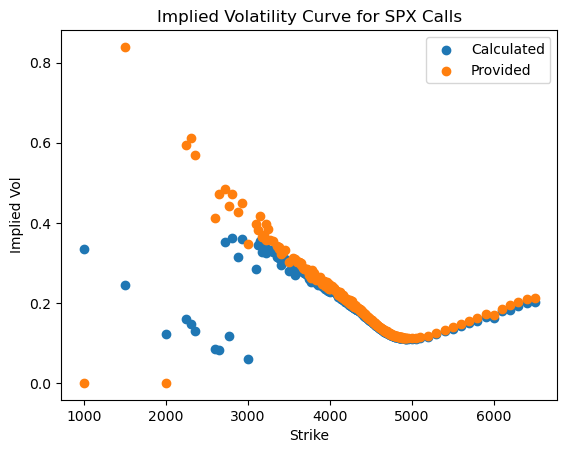

In [226]:
import datetime as dt
import matplotlib.pyplot as plt


calls2 = calls

today = dt.date.today()
expiration = dt.date(2021, 12, 31)
time_to_expiration = expiration - today
time_to_expiration = int(time_to_expiration.days)/365

calls2['time_to_expiration'] = time_to_expiration

open = float(history.iloc[0]["Open"])
close = float(history.iloc[0]["Close"])
calls2['spot_price'] = (open+close)/2



ivs_call = [] 

for row in calls2.itertuples():
    iv_call = Brent_IV((row.Bid + row.Ask)/2, row.spot_price, row.Strike, 0.013, row.time_to_expiration, 0.0123, "call")
    ivs_call.append(iv_call)

ivs2 = []
for items in calls.IV:
  ivs2.append(float(items[:-1])/100)
  


calculated = plt.scatter(calls2.Strike, ivs_call, label='Calculated')
provided = plt.scatter(calls.Strike, ivs2, label='Provided')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.title('Implied Volatility Curve for SPX Calls')
plt.legend() 
plt.show()





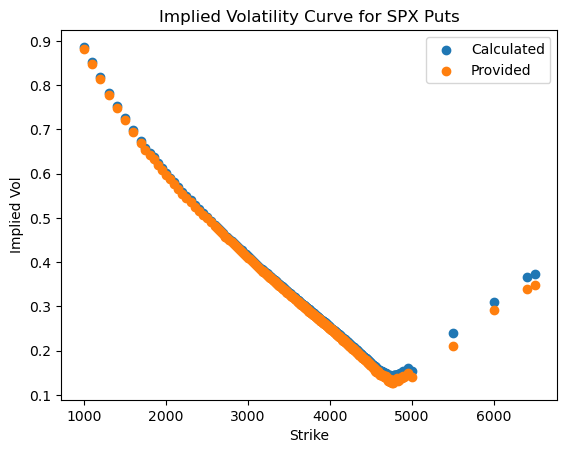

In [227]:
puts2 = puts

today = dt.date.today()
expiration = dt.date(2021, 12, 31)
time_to_expiration = expiration - today
time_to_expiration = int(time_to_expiration.days)/365

puts2['time_to_expiration'] = time_to_expiration

open = float(history.iloc[0]["Open"])
close = float(history.iloc[0]["Close"])
puts2['spot_price'] = (open+close)/2


ivs_put = [] 

for row in puts2.itertuples():
    iv_put = Brent_IV((row.Bid + row.Ask)/2, row.spot_price, row.Strike, 0.013, row.time_to_expiration, 0.0123, "put")
    ivs_put.append(iv_put)

ivs3 = []
for items in puts.IV:
  ivs3.append(float(items[:-1])/100)
  


plt.scatter(puts2.Strike, ivs_put, label='Calculated')
plt.scatter(puts.Strike, ivs3, label='Provided')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.title('Implied Volatility Curve for SPX Puts')
plt.legend() 
plt.show()




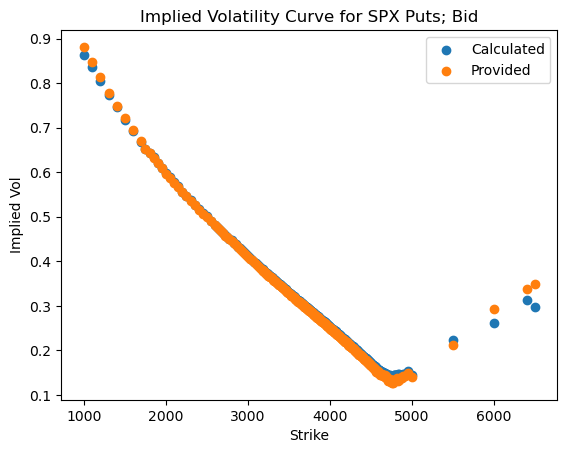

In [225]:
ivs_bid = [] 

for row in puts2.itertuples():
    iv_bid = Brent_IV(row.Bid, row.spot_price, row.Strike, 0.013, row.time_to_expiration, 0.0123, "put")
    ivs_bid.append(iv_bid)

ivs4 = []
for items in puts.IV:
  ivs4.append(float(items[:-1])/100)
  


calculated = plt.scatter(puts2.Strike, ivs_bid, label='Calculated')
provided = plt.scatter(puts.Strike, ivs4, label='Provided')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.title('Implied Volatility Curve for SPX Puts; Bid')
plt.legend() 
plt.show()



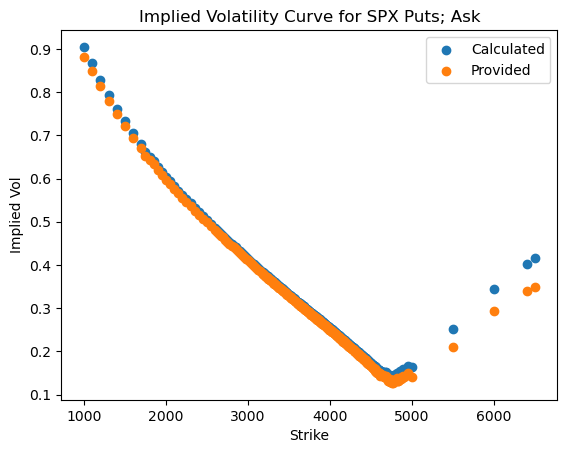

In [230]:
ivs_ask = [] 

for row in puts2.itertuples():
    iv_ask = Brent_IV(row.Ask, row.spot_price, row.Strike, 0.013, row.time_to_expiration, 0.0123, "put")
    ivs_ask.append(iv_ask)

ivs5 = []
for items in puts.IV:
  ivs5.append(float(items[:-1])/100)
  


calculated = plt.scatter(puts2.Strike, ivs_ask, label='Calculated')
provided = plt.scatter(puts.Strike, ivs5, label='Provided')
plt.xlabel('Strike')
plt.ylabel('Implied Vol')
plt.title('Implied Volatility Curve for SPX Puts; Ask')
plt.legend() 
plt.show()

